# Practice notebook for univariate analysis using NHANES data

# Example Solutions

**This notebook contains one or or more code examples for the practice questions.**

**Your code might be different. But the output should be the same.**

**Do you have a alternate solution to a question? Share it with your peers on the course forum!**

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES data.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
# import the usual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# set the display.max_columns option to None so that all columns will display
pd.set_option('display.max_columns', None)

# read the nhanes csv file
da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
# browse the variables
# the variable code book is available at https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [4]:
# browse the data
da.head(10)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,4.0,5,11252.31,1,128,2.82,116.0,58.0,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,5.0,3,37043.09,2,128,2.08,110.0,70.0,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,1.0,4,22744.36,1,125,1.03,120.0,70.0,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,NaN,3,18526.16,2,122,5.00,NaN,NaN,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,3.0,1,20395.54,2,126,1.19,178.0,116.0,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.cut.html

https://pandas.pydata.org/docs/reference/api/pandas.interval_range.html

In [5]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [6]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# relabel DMDMARTL
rmar = {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"}
da_mod["DMDMARTLx"] = da_mod["DMDMARTL"].replace(rmar)

# relabel RIAGENDR
rgen = {1: "Male", 2: "Female"}
da_mod["RIAGENDRx"] = da_mod["RIAGENDR"].replace(rgen)

# drop the variables that we don't need
da_mod = da_mod[["RIAGENDRx", "RIDAGEYR", "DMDMARTLx"]]

In [7]:
# frequency table for all subjects
# uncomment print(x / x.sum()) for proportions instead of counts
print("All Subjects")
x = da_mod["DMDMARTLx"].value_counts()
#print(x / x.sum())
print(x)

# frequency table by gender
for ky,db in da_mod.groupby("RIAGENDRx"):
    print("\nRIAGENDRx =", ky)
    x = db["DMDMARTLx"].value_counts()
    #print(x / x.sum())
    print(x)

# create new dataframe restricted to subjects between 30 and 40 (inclusive)
da3040 = da_mod.query('RIDAGEYR >= 30 & RIDAGEYR <= 40').copy()

# frequency table for all subjects
print("\nAll Subjects 30 <= RIDAGEYR <= 40")
x = da3040["DMDMARTLx"].value_counts()
#print(x / x.sum())
print(x)

# frequency table by RIAGENDRx
for ky,db in da3040.groupby("RIAGENDRx"):
    print("\nRIAGENDRx =", ky, "30 <= RIDAGEYR <= 40")
    x = db["DMDMARTLx"].value_counts()
    #print(x / x.sum())
    print(x)

# another way to generate the age-restricted frequency table...

# create a closed interval range from 30 to 40
#binrange = pd.interval_range(start=30, end=40, periods=1, closed='both')

# create the 30-40 'bin' variable
#da_mod["agegrp"] = pd.cut(da_mod.RIDAGEYR, binrange)

# what does agegroup look like?
#print(da_mod.agegrp.value_counts(dropna=False))

# frequency table for all subjects
#x = da_mod.groupby(["agegrp"])["DMDMARTLx"].value_counts()
#print("\nAll Subjects 30 <= RIDAGEYR <= 40")
#print(x)

# frequency table by RIAGENDRx
#x = da_mod.groupby(["agegrp", "RIAGENDRx"])["DMDMARTLx"].value_counts()
#print("\nMales and Females 30 <= RIDAGEYR <= 40")
#print(x)

All Subjects
Married         2780
NeverMarried    1004
Divorced         579
Cohabitating     527
Widowed          396
Separated        186
Refused            2
Name: DMDMARTLx, dtype: int64

RIAGENDRx = Female
Married         1303
NeverMarried     520
Divorced         350
Widowed          296
Cohabitating     262
Separated        118
Refused            1
Name: DMDMARTLx, dtype: int64

RIAGENDRx = Male
Married         1477
NeverMarried     484
Cohabitating     265
Divorced         229
Widowed          100
Separated         68
Refused            1
Name: DMDMARTLx, dtype: int64

All Subjects 30 <= RIDAGEYR <= 40
Married         560
NeverMarried    217
Cohabitating    143
Divorced         70
Separated        30
Widowed           5
Refused           1
Name: DMDMARTLx, dtype: int64

RIAGENDRx = Female 30 <= RIDAGEYR <= 40
Married         285
NeverMarried    116
Cohabitating     65
Divorced         46
Separated        18
Widowed           2
Name: DMDMARTLx, dtype: int64

RIAGENDRx = Male 30 <

__Q1a.__ What are the differences (if any) that you observe in the distribution of marital status between females and males?



__Q1b.__ What are the differences (if any) that you observe in the distribution of marital status between females overall and females aged 30 to 40?

__Q1c.__ Repeat part Q1b for males.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [8]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [9]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# relabel DMDMARTL
rmar = {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"}
da_mod["DMDMARTLx"] = da_mod["DMDMARTL"].replace(rmar)

# drop the variables that we don't need
da_mod = da_mod[["RIAGENDR", "RIDAGEYR", "DMDMARTLx"]]

In [10]:
# one possible solution uses the math library
import math

# restrict the dataset to females only
da_mod = da_mod.query('RIAGENDR == 2').copy()

# calculate the minimum and maximum ages
minage = min(da_mod.RIDAGEYR)
maxage = max(da_mod.RIDAGEYR)

# one way to create the list of bins so that the first bin is closed on the left
bins = [minage] + list(range(int(math.ceil(minage/10)) * 10, int(math.ceil(maxage/10)) * 10, 10)) + [maxage]

# another way to create the list of bins without using the math library
# bins = [18, 20, 30, 40, 50, 60, 70, 80]
#print(bins)

# create labels for the bins
labels = [f"({bins[i]}, {bins[i+1]}]" if(i) else f"[{bins[i]}, {bins[i+1]}]" for i in range(len(bins)-1)]

# create the agegrp "bins" variable
da_mod["agegrp"] = pd.cut(da_mod.RIDAGEYR, bins, labels=labels, include_lowest = True)

# what does agegroup look like?
#print(da_mod.agegrp.value_counts(dropna=False))

# what does DMDMARTLx look like? Any rare or missing values?
#print(da_mod.DMDMARTLx.value_counts(dropna=False))

# distribution of marital status
dx = da_mod.loc[~da_mod.DMDMARTLx.isin(["Refused", np.nan]), :]  # drop rare/missing values
dx = dx.groupby(["agegrp"])["DMDMARTLx"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print("Females")
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

# alternative that replaces NaN with 0
#print(dx.fillna(0).to_string(float_format="%.3f"))

Females
DMDMARTLx  Cohabitating  Divorced  Married  NeverMarried  Separated  Widowed
agegrp                                                                      
[18, 20]          0.205       NaN    0.026         0.769        NaN      NaN
(20, 30]          0.206     0.021    0.305         0.446      0.021      NaN
(30, 40]          0.120     0.091    0.544         0.205      0.036    0.004
(40, 50]          0.074     0.137    0.574         0.125      0.066    0.024
(50, 60]          0.068     0.177    0.548         0.090      0.058    0.060
(60, 70]          0.043     0.193    0.481         0.086      0.050    0.147
(70, 80]          0.007     0.144    0.317         0.051      0.020    0.461


__Q2a.__ What trends (if any) do you see in this series of marginal distributions?

__Q2b.__ Repeat the analysis for males.

In [11]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [12]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# relabel DMDMARTL
rmar = {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "NeverMarried", 6: "Cohabitating", 77: "Refused", 99: "Unknown"}
da_mod["DMDMARTLx"] = da_mod["DMDMARTL"].replace(rmar)

# drop the variables that we don't need
da_mod = da_mod[["RIAGENDR", "RIDAGEYR", "DMDMARTLx"]]

In [13]:
# one possible solution uses the math library
import math

# restrict the dataset to males only
da_mod = da_mod.query('RIAGENDR == 1').copy()

# calculate the minimum and maximum ages
minage = min(da_mod.RIDAGEYR)
maxage = max(da_mod.RIDAGEYR)

# one way to create the list of bins so that the first bin is closed on the left
bins = [minage] + list(range(int(math.ceil(minage/10)) * 10, int(math.ceil(maxage/10)) * 10, 10)) + [maxage]

# another (manual) way to create the list of bins without using the math library
# bins = [18, 20, 30, 40, 50, 60, 70, 80]
#print(bins)

# create labels for the bins
labels = [f"({bins[i]}, {bins[i+1]}]" if(i) else f"[{bins[i]}, {bins[i+1]}]" for i in range(len(bins)-1)]

# create the agegrp "bins" variable
da_mod["agegrp"] = pd.cut(da_mod.RIDAGEYR, bins, labels=labels, include_lowest = True)

# what does agegroup look like?
#print(da_mod.agegrp.value_counts(dropna=False))

# what does DMDMARTLx look like? Any rare or missing values?
#print(da_mod.DMDMARTLx.value_counts(dropna=False))

dx = da_mod.loc[~da_mod.DMDMARTLx.isin(["Refused", np.nan]), :]  # drop rare/missing values
dx = dx.groupby(["agegrp"])["DMDMARTLx"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print("Males")
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

# alternative that replaces NaN with 0
#print(dx.fillna(0).to_string(float_format="%.3f"))

Males
DMDMARTLx  Cohabitating  Divorced  Married  NeverMarried  Separated  Widowed
agegrp                                                                      
[18, 20]          0.075       NaN    0.025         0.900        NaN      NaN
(20, 30]          0.213     0.005    0.238         0.523      0.016    0.005
(30, 40]          0.158     0.053    0.565         0.195      0.026    0.004
(40, 50]          0.082     0.085    0.703         0.097      0.027    0.005
(50, 60]          0.075     0.126    0.652         0.104      0.022    0.022
(60, 70]          0.050     0.126    0.666         0.087      0.032    0.039
(70, 80]          0.022     0.142    0.612         0.022      0.035    0.167


__Q2c.__ Comment on any notable differences that you see when comparing these results between females and for males.

## Question 3

Use histplot to generate a histogram of the distribution of heights using the [BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT) variable.

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm

https://seaborn.pydata.org/generated/seaborn.histplot.html

In [14]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [15]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# relabel RIAGENDR
rgen = {1: "Male", 2: "Female"}
da_mod["RIAGENDRx"] = da_mod["RIAGENDR"].replace(rgen)

<Axes: xlabel='BMXHT', ylabel='Count'>

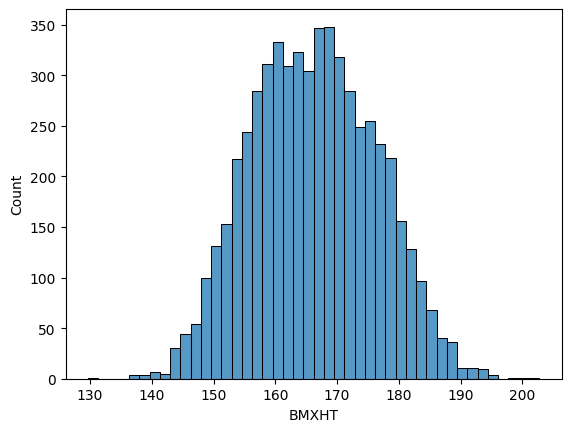

In [16]:
# entire sample
sns.histplot(da_mod.BMXHT)

__Q3a.__ Use the bins argument to histplot to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result. What happens as the number of bins grows excessively large or excessively small?

https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

<Axes: xlabel='BMXHT', ylabel='Count'>

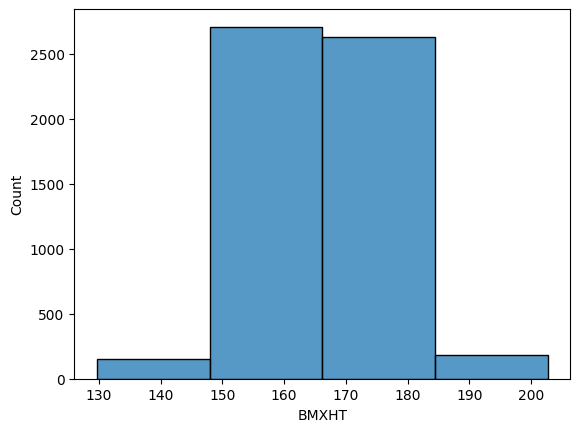

In [17]:
# bins = 4
sns.histplot(da_mod.BMXHT, bins=4)

<Axes: xlabel='BMXHT', ylabel='Count'>

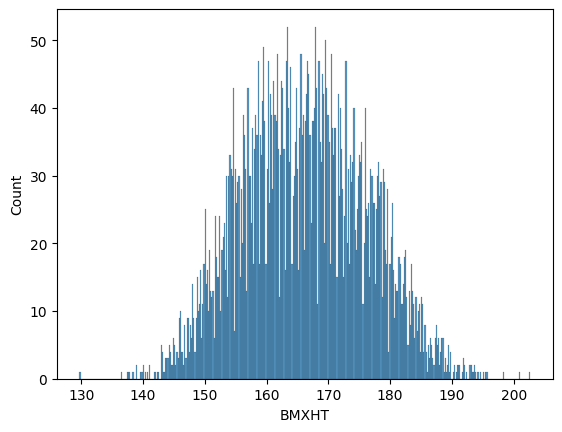

In [18]:
# bins = 400
sns.histplot(da_mod.BMXHT, bins=400)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='BMXHT', ylabel='Count'>

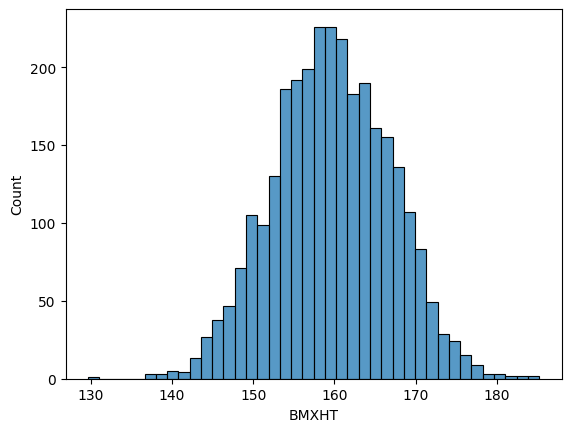

In [19]:
# histogram of female BMXHT
dafem = da_mod.query('RIAGENDR == 2')
sns.histplot(data=dafem.BMXHT)

<Axes: xlabel='BMXHT', ylabel='Count'>

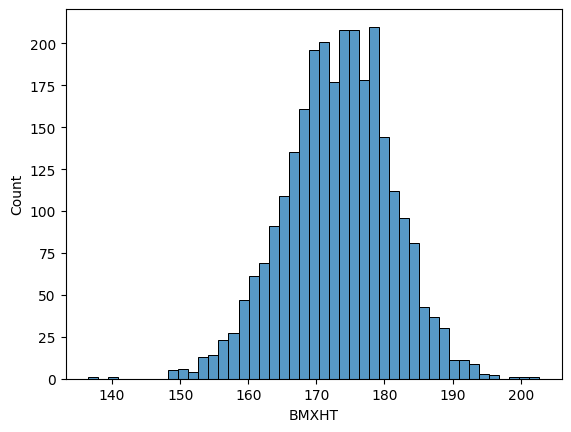

In [20]:
# histogram of male BMXHT
damal = da_mod.query('RIAGENDR == 1')
sns.histplot(data=damal.BMXHT)

<Axes: xlabel='BMXHT', ylabel='RIAGENDRx'>

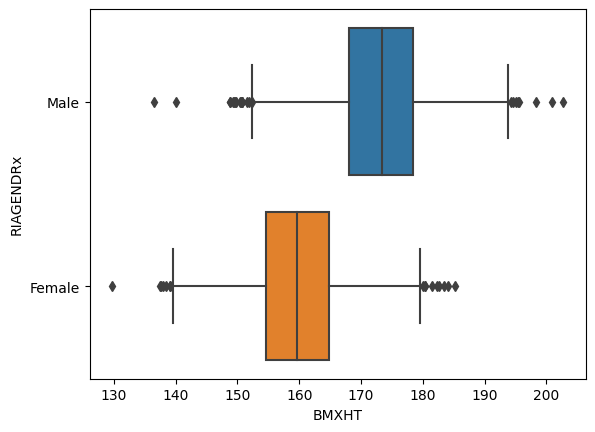

In [21]:
# boxplot of BMXHT by RIAGENDRx
sns.boxplot(data=da_mod, x="BMXHT", y="RIAGENDRx")

__Q3c.__ What features (if any) are not represented clearly in the boxplots, and what features (if any) are easier to see in the boxplots than in the histograms?

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm

In [22]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [23]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

<Axes: >

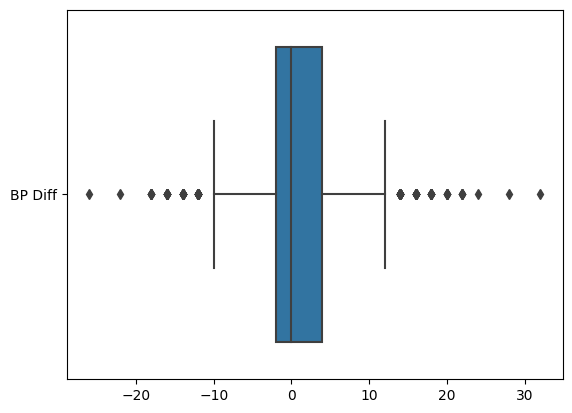

In [24]:
# boxplot of difference between BPXSY1 and BPXSY2
da_mod["BP Diff"] = da_mod.BPXSY1 - da.BPXSY2
sns.boxplot(data=da_mod[["BP Diff"]], orient="h")

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [25]:
# create a boolean variable that is True if "BP Diff" is positive and False if "BP Diff" is negative
lower_second = (da_mod["BP Diff"].dropna() > 0)

# Booleans are either True or False but...
# internally Python stores True values as 1 and False values as 0...
# so taking the average of a Boolean variable will give us the proportion of 1 values (True values)
print(np.mean(lower_second))

# another way to measure the proportion of True and False values
#print(lower_second.value_counts(normalize=True))

0.45874464518532315


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

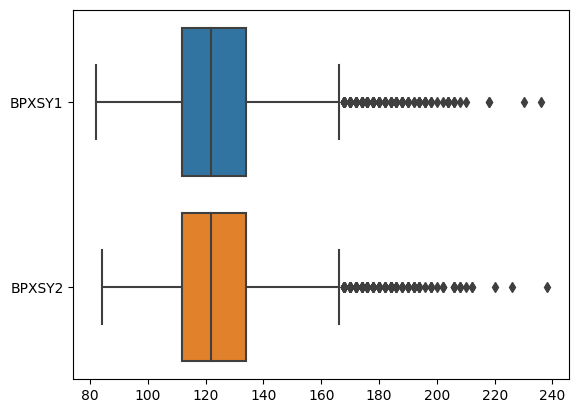

In [26]:
# boxplot to compare BPXSY1 and BPXSY2
sns.boxplot(data=da_mod.loc[:,["BPXSY1", "BPXSY2"]], orient='h')
plt.show()

__Q4c.__ Comment on the systolic blood pressure measurement variation (either BPXSY1 or BPXSY2) and the within-subject difference variation.

In [27]:
# Numerical summaries might also be helpful in this instance
print(da_mod.BPXSY1.describe(), "\n")
print(da_mod.BPXSY2.describe(), "\n")
print(da_mod["BP Diff"].describe())

count    5401.000000
mean      125.084614
std        18.480873
min        82.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64 

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64 

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BP Diff, dtype: float64


## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).

Convert the frequencies to proportions.

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [28]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [29]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

In [30]:
# frequency (counts) table
pd.crosstab(da_mod.DMDEDUC2,da_mod.DMDHHSIZ)

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,72,147,96,87,97,71,85
2.0,75,143,105,98,94,73,55
3.0,181,321,203,192,130,78,81
4.0,245,436,313,274,198,82,73
5.0,195,475,265,226,130,40,35
9.0,0,2,0,0,1,0,0


In [31]:
# normalized (by row) freqency table
pd.crosstab(da_mod.DMDEDUC2,da_mod.DMDHHSIZ, margins=True, normalize='index')

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,0.109924,0.224427,0.146565,0.132824,0.148092,0.108397,0.129771
2.0,0.116641,0.222395,0.163297,0.152411,0.146190,0.113530,0.085537
3.0,0.152614,0.270658,0.171164,0.161889,0.109612,0.065767,0.068297
4.0,0.151141,0.268970,0.193091,0.169031,0.122147,0.050586,0.045034
5.0,0.142753,0.347731,0.193997,0.165447,0.095168,0.029283,0.025622
9.0,0.000000,0.666667,0.000000,0.000000,0.333333,0.000000,0.000000
All,0.140300,0.278407,0.179393,0.160212,0.118743,0.062843,0.060102


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [32]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [33]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# relabel RIAGENDR
rgen = {1: "Male", 2: "Female"}
da_mod["RIAGENDRx"] = da_mod["RIAGENDR"].replace(rgen)

# relabel DMDEDUC2
redu = {1: "1) LT 9", 2: "2) 9 to 11", 3: "3) HS or GED", 4: "4) Some college or AA", 5: "5) College", 7: "7) Refused", 9: "9) Don't know"}
da_mod["DMDEDUC2x"] = da_mod.DMDEDUC2.replace(redu)

# drop the variables that we don't need
da_mod = da_mod[["RIAGENDRx", "RIDAGEYR", "DMDEDUC2x", "DMDHHSIZ"]]

In [34]:
# create a closed interval range from 30 to 40
binrange = pd.interval_range(start=30, end=40, periods=1, closed='both')

# create the 30-40 'bin' variable
da_mod["agegrp"] = pd.cut(da_mod.RIDAGEYR, binrange)

# what does DMDEDUC2x look like?
#print(da_mod.DMDEDUC2x.value_counts())

# drop rare or missing values
da_mod = da_mod.loc[~da_mod.DMDEDUC2x.isin(["7) Refused", "9) Don't know"]), :]

# median by RIAGENDRx and DMDEDUC2x
dx = da_mod.groupby(["agegrp", "RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].median()
print(dx)

# another way to isolate subjects between 30 and 40 years old
#da3040 = da_mod.query('RIDAGEYR >= 30 & RIDAGEYR <= 40').copy()

# median by RIAGENDRx and DMDEDUC2x
#print(da3040.groupby(["RIAGENDRx", "DMDEDUC2x"])["DMDHHSIZ"].median())

agegrp    RIAGENDRx  DMDEDUC2x            
[30, 40]  Female     1) LT 9                  5.0
                     2) 9 to 11               5.0
                     3) HS or GED             5.0
                     4) Some college or AA    4.0
                     5) College               3.0
          Male       1) LT 9                  5.0
                     2) 9 to 11               4.5
                     3) HS or GED             4.0
                     4) Some college or AA    4.0
                     5) College               3.0
Name: DMDHHSIZ, dtype: float64


## Question 6

The participants can be clustered into "masked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU. Report the ratio between the largest and smallest mean (e.g. for height) for each gender across the MVUs.

Note: SDMVSTRA and SDMVPSU are not used this way in a real-world analysis. Their intended use within NHANES is for complex variation estimation.

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html

In [35]:
# if necessary reload the nhanes csv file to avoid possible data "contamination" from previous work
da = pd.read_csv("nhanes_2015_2016.csv")

In [36]:
# make copy of the dataframe to protect the original
da_mod = da.copy()

# separate into two dataframes by RIAGENDRx
dam = da_mod.where(da_mod.RIAGENDR == 1)
daf = da_mod.where(da_mod.RIAGENDR == 2)

# drop the variables that we don't need
dam = dam[["SDMVSTRA", "SDMVPSU", "RIDAGEYR", "BMXHT", "BMXBMI"]]
daf = daf[["SDMVSTRA", "SDMVPSU", "RIDAGEYR", "BMXHT", "BMXBMI"]]

In [37]:
# Analysis for Males

# calculate the mean for RIDAGEYR, BMXHT and BMXBMI for each MVU
da_mean = dam.groupby(['SDMVPSU', 'SDMVSTRA']).mean()

# calculate and print the BMXHT mean ratio
ratio_height_mean = da_mean['BMXHT'].max()/da_mean['BMXHT'].min()
print("Males")
print(round(ratio_height_mean, 3), " (Height)")

# calculate and print the RIDAGEYR mean ratio
ratio_age_mean = da_mean['RIDAGEYR'].max()/da_mean['RIDAGEYR'].min()
print(round(ratio_age_mean, 3), " (Age)")

# calculate and print the BMXBMI mean ratio
ratio_bmi_mean = da_mean['BMXBMI'].max()/da_mean['BMXBMI'].min()
print(round(ratio_bmi_mean, 3), " (BMI)")

# Analysis for Females

# calculate the mean for RIDAGEYR, BMXHT and BMXBMI across MVUs
da_mean = daf.groupby(['SDMVPSU', 'SDMVSTRA']).mean()

# calculate and print the BMXHT mean ratio
ratio_height_mean = da_mean['BMXHT'].max()/da_mean['BMXHT'].min()
print("\nFemales")
print(round(ratio_height_mean, 3), " (Height)")

# calculate and print the RIDAGEYR rmean atio
ratio_age_mean = da_mean['RIDAGEYR'].max()/da_mean['RIDAGEYR'].min()
print(round(ratio_age_mean, 3), " (Age)")

# calculate and print the BMXBMI mean ratio
ratio_bmi_mean = da_mean['BMXBMI'].max()/da_mean['BMXBMI'].min()
print(round(ratio_bmi_mean, 3), " (BMI)")

Males
1.045  (Height)
1.311  (Age)
1.233  (BMI)

Females
1.048  (Height)
1.308  (Age)
1.246  (BMI)


__Q6a.__ Comment on the extent to which mean age, height, and BMI vary across the MVUs for males and females.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smallest IQR across the MVUs.

https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.quantile.html


In [38]:
# Males

# calculate the 2nd and 3rd quintiles for RIDAGEYR, BMXHT and BMXBMI for each MVU
da_q3 = dam.groupby(['SDMVPSU', 'SDMVSTRA']).quantile(.75, numeric_only=True)
da_q1 = dam.groupby(['SDMVPSU', 'SDMVSTRA']).quantile(.25, numeric_only=True)

# calculate the IQR for RIDAGEYR, BMXHT and BMXBMI
da_iqr = da_q3 - da_q1

# calculate and print the BMXHT iqr ratio
ratio_height_iqr = da_iqr['BMXHT'].max()/da_iqr['BMXHT'].min()
print("Males")
print(round(ratio_height_iqr, 3), " (Height)")

# calculate and print the RIDAGEYR iqr ratio
ratio_age_iqr = da_iqr['RIDAGEYR'].max()/da_iqr['RIDAGEYR'].min()
print(round(ratio_age_iqr, 3), " (Age)")

# calculate and print the BMXBMI iqr ratio
ratio_bmi_iqr = da_iqr['BMXBMI'].max()/da_iqr['BMXBMI'].min()
print(round(ratio_bmi_iqr, 3), " (BMI)")

# Females

# calculate the 2nd and 3rd quintiles for RIDAGEYR, BMXHT and BMXBMI across MVUs
da_q3 = daf.groupby(['SDMVPSU', 'SDMVSTRA']).quantile(.75, numeric_only=True)
da_q1 = daf.groupby(['SDMVPSU', 'SDMVSTRA']).quantile(.25, numeric_only=True)

# calculate the IQR for RIDAGEYR, BMXHT and BMXBMI
da_iqr = da_q3 - da_q1

# calculate and print the BMXHT iqr ratio
ratio_height_iqr = da_iqr['BMXHT'].max()/da_iqr['BMXHT'].min()
print("\nFemales")
print(round(ratio_height_iqr, 3), " (Height)")

# calculate and print the RIDAGEYR iqr ratio
ratio_age_iqr = da_iqr['RIDAGEYR'].max()/da_iqr['RIDAGEYR'].min()
print(round(ratio_age_iqr, 3), " (Age)")

# calculate and print the BMXBMI iqr ratio
ratio_bmi_iqr = da_iqr['BMXBMI'].max()/da_iqr['BMXBMI'].min()
print(round(ratio_bmi_iqr, 3), " (BMI)")


Males
1.587  (Height)
1.831  (Age)
2.341  (BMI)

Females
1.587  (Height)
1.625  (Age)
1.516  (BMI)


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary across the MVUs for males and females.